In [ ]:
!pip3 install --upgrade --quiet google-cloud-aiplatform

In [1]:
!gcloud config list

[compute]
region = us-central1
[core]
account = 58311848027-compute@developer.gserviceaccount.com
disable_usage_reporting = True
project = vertex-ai-initial-project
[dataproc]
region = us-central1

Your active configuration is: [default]


In [2]:
PROJECT_ID = 'vertex-ai-initial-project'
BUCKET_URI = 'gs://vertex-bucket-281'
REGION = 'us-central1'

In [3]:
# import the aiplatform submodule
from google.cloud import aiplatform as ai

ai.init(project=PROJECT_ID, location=REGION, staging_bucket=BUCKET_URI)


In [4]:
# Load Dataset

import pandas as pd

# Path to your CSV file in GCS bucket
gcs_path = "gs://vertex-bucket-281/dataset/dry_bean.csv"

beans = pd.read_csv(gcs_path)

beans.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
# Save feature names
feature_names = beans.columns.tolist()

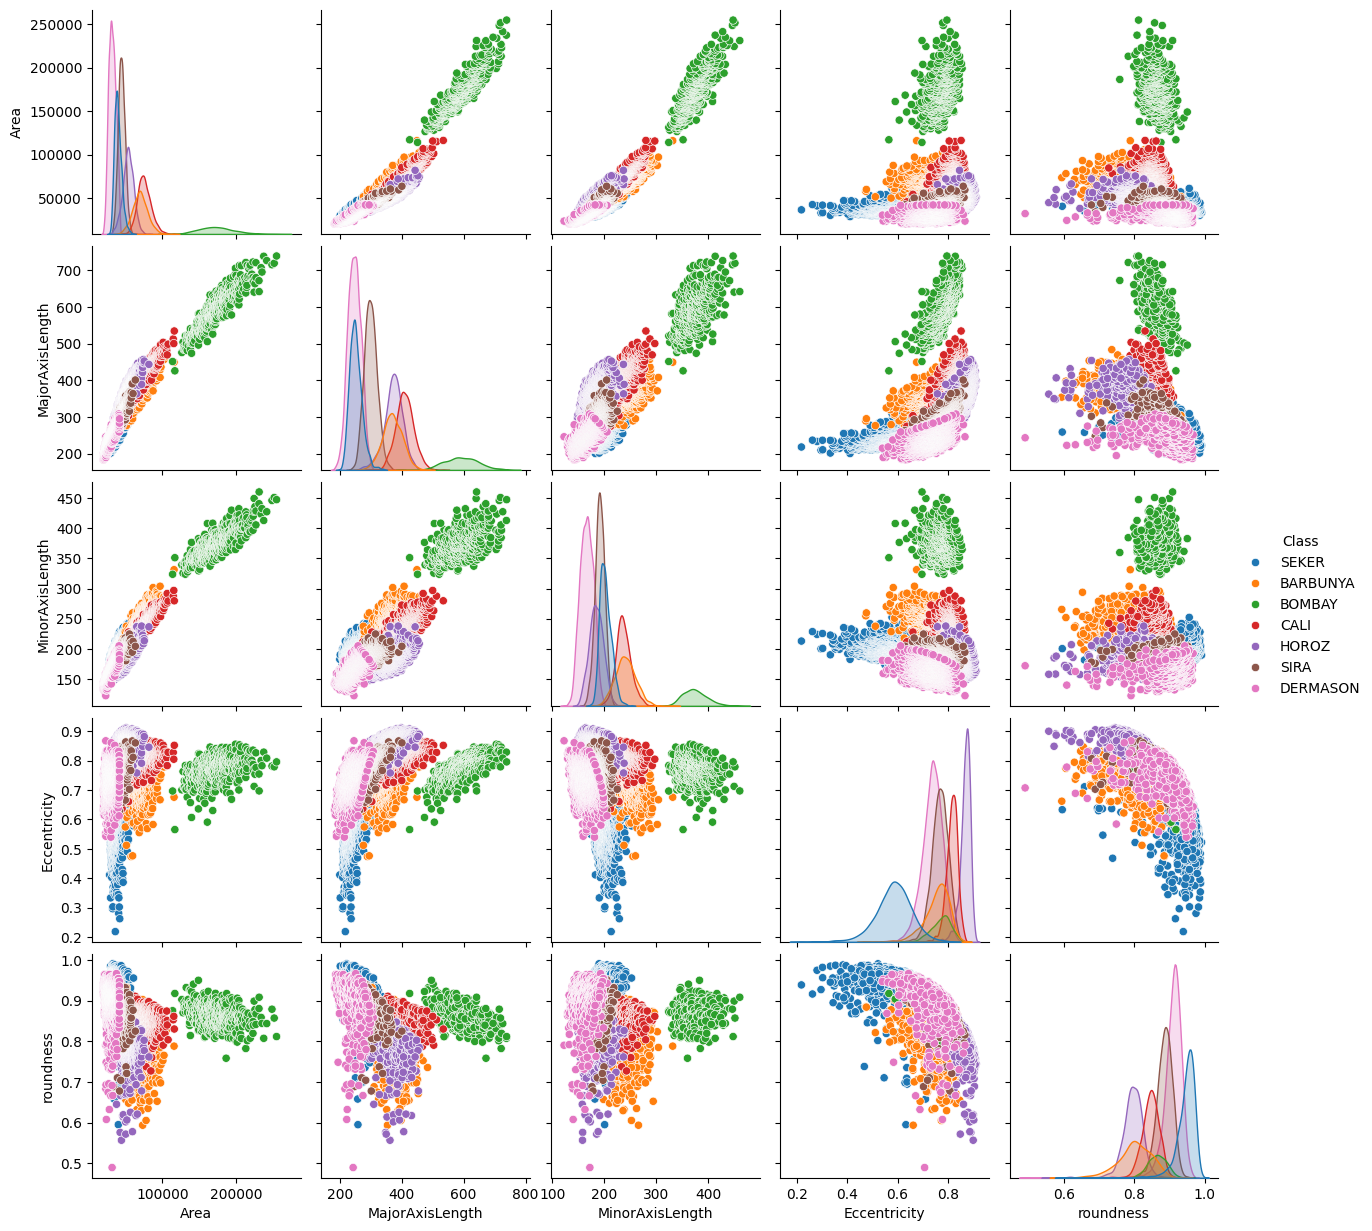

In [7]:
# Create a pair-plot of a few features that seem important

import seaborn as sns

sns.pairplot(
   beans,
   vars=["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "roundness"],
   hue="Class",
);


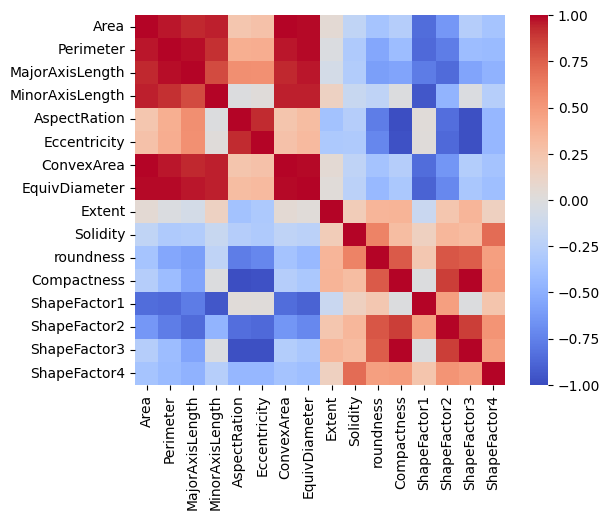

In [8]:
# Plot a correlation matrix
import matplotlib.pyplot as plt

correlation = beans.corr(numeric_only=True)

# Create a square heatmap with center at 0
sns.heatmap(correlation, center=0, square=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.show()

In [9]:
# Running an AutoML training job
# Initialize dataset object compatible with AutoML:

ds = ai.TabularDataset.create(
   display_name="dry_bean_dataset", gcs_source=gcs_path
)

Creating TabularDataset
Create TabularDataset backing LRO: projects/58311848027/locations/us-central1/datasets/2007939679516622848/operations/3431050120651603968
TabularDataset created. Resource name: projects/58311848027/locations/us-central1/datasets/2007939679516622848
To use this TabularDataset in another session:
ds = aiplatform.TabularDataset('projects/58311848027/locations/us-central1/datasets/2007939679516622848')


In [10]:
type(ds)

google.cloud.aiplatform.datasets.tabular_dataset.TabularDataset

In [11]:
ds.resource_name

'projects/58311848027/locations/us-central1/datasets/2007939679516622848'

In [12]:
# Initialize the job with ai.AutoMLTabularTrainingJob class. It requires two arguments:

# 1. A display name for the job
# 2. The objective of the task — classification, in this case.

job = ai.AutoMLTabularTrainingJob(
   display_name="dry-bean-classification",
   optimization_prediction_type="classification",
)

In [ ]:
# Run the job's "run" method
model = job.run(
   dataset=ds,
   target_column="Class",
   training_fraction_split=0.8,
   validation_fraction_split=0.1,
   test_fraction_split=0.1,
   model_display_name="baseline-classification-model",
   disable_early_stopping=False,
)

No column transformations provided, so now retrieving columns from dataset in order to set default column transformations.
The column transformation of type 'auto' was set for the following columns: ['Perimeter', 'Area', 'ConvexArea', 'Compactness', 'ShapeFactor2', 'ShapeFactor3', 'MinorAxisLength', 'AspectRation', 'roundness', 'ShapeFactor1', 'Eccentricity', 'Extent', 'ShapeFactor4', 'EquivDiameter', 'Solidity', 'MajorAxisLength'].
View Training:
https://console.cloud.google.com/ai/platform/locations/us-central1/training/9136367097633308672?project=58311848027
AutoMLTabularTrainingJob projects/58311848027/locations/us-central1/trainingPipelines/9136367097633308672 current state:
PipelineState.PIPELINE_STATE_RUNNING
AutoMLTabularTrainingJob projects/58311848027/locations/us-central1/trainingPipelines/9136367097633308672 current state:
PipelineState.PIPELINE_STATE_RUNNING
AutoMLTabularTrainingJob projects/58311848027/locations/us-central1/trainingPipelines/9136367097633308672 current st